In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib import pyplot
from pylab import rcParams
import pickle as pk
import gc

This notebook demonstrates using bi-variate histogram plotting (hexbin) to decipher the structure within the dense BOTPT bottom pressure dataset. The data has been subsampled from 20 Hz down to the mean value within every minute. See notebook 01_botpt_data_wrangling.ipynb.

In [2]:
with open('data/pressure_min.pd', 'rb') as f:
    botpt_data = pk.load(f)

In [3]:
time = list(botpt_data.index.values)
pressure = list(botpt_data['bottom_pressure'].values)

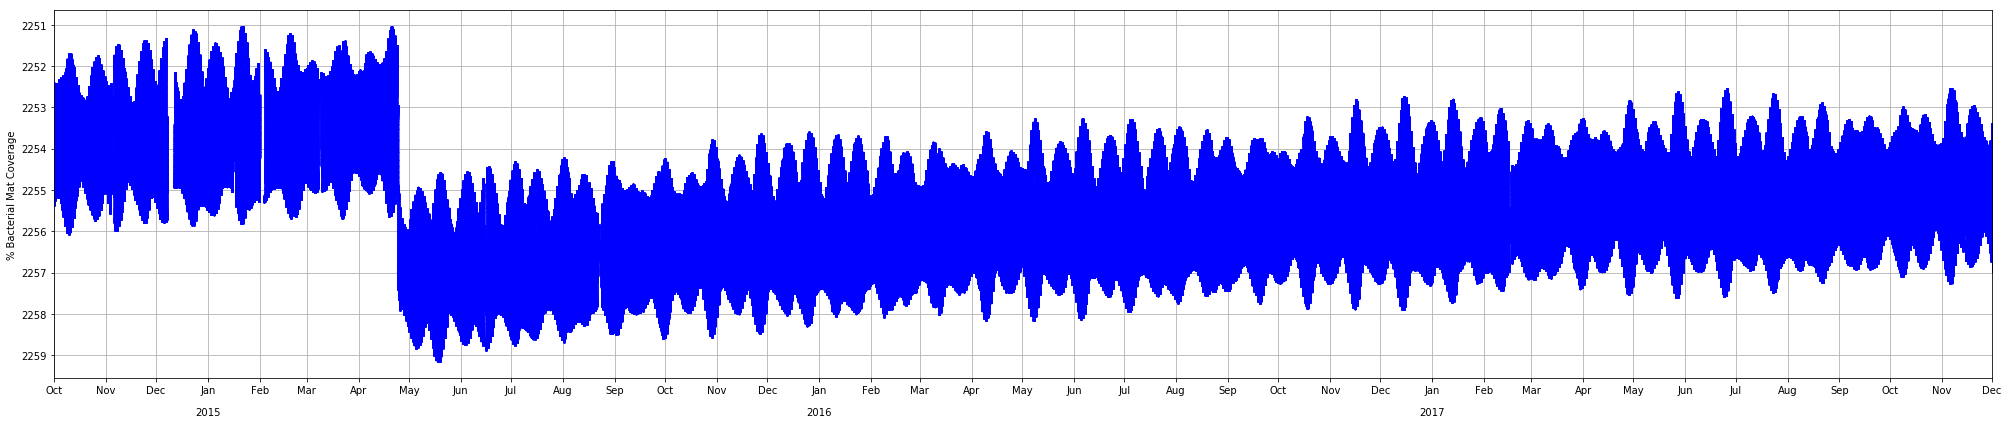

In [4]:
plt.close()
fig, ax = plt.subplots();
fig.set_size_inches(28, 6)
plt.plot(time,pressure, linestyle='None', marker='o', markersize=1, color='blue')
ax.set_xlim(datetime.datetime(2014, 10, 1, 0, 0),datetime.datetime(2017, 12, 1, 0, 0))
years = dates.YearLocator()
months = dates.MonthLocator()
yearsFmt = dates.DateFormatter('\n\n%Y')
monthsFmt = dates.DateFormatter('%b')
# plt.xticks(rotation=70)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)
ax.xaxis.set_minor_locator(years)
ax.xaxis.set_minor_formatter(yearsFmt)
plt.gca().invert_yaxis()
plt.ylabel('% Bacterial Mat Coverage')
plt.grid()
plt.tight_layout()
plt.show()

In [5]:
time_int = []
time = list(pd.to_datetime(botpt_data.index.values))
for i in time:
    i = np.datetime64(i).astype(datetime.datetime)
    time_int.append(dates.date2num(i))

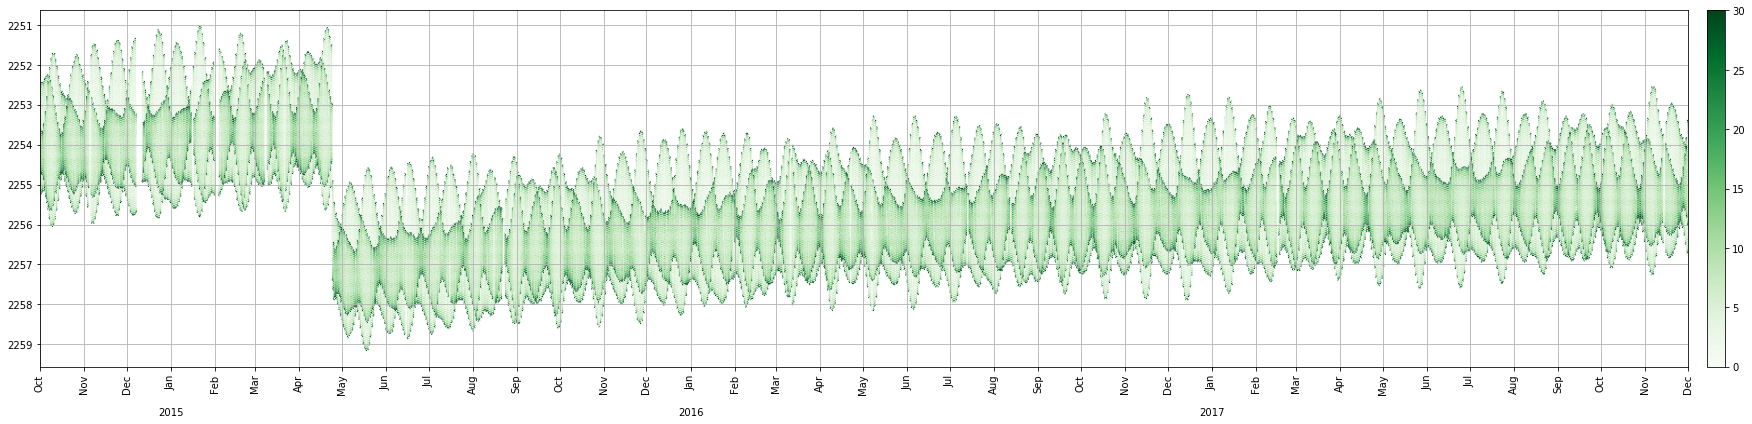

In [6]:
plt.close()
fig, ax = plt.subplots()
fig.set_size_inches(28, 6)
hb1 = ax.hexbin(time_int, pressure, vmin=0, vmax=30, gridsize=(1500,150), mincnt=1, cmap='Greens', linewidths=0)
fig.colorbar(hb1, pad = 0.01)
ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.set_xlim(datetime.datetime(2014, 10, 1, 0, 0),datetime.datetime(2017, 12, 1, 0, 0))
years = dates.YearLocator()
months = dates.MonthLocator()
yearsFmt = dates.DateFormatter('\n\n\n%Y')
monthsFmt = dates.DateFormatter('%b')
# plt.xticks(rotation=70)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)
ax.xaxis.set_minor_locator(years)
ax.xaxis.set_minor_formatter(yearsFmt)
plt.tight_layout()
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)
plt.gca().invert_yaxis()
plt.show()

# out = 'plots3/botpt_greens'+'.png'
# fig.savefig(out, bbox_inches='tight', transparent=True, pad_inches=0, orientation='portrait', format='png', dpi=300)